# IFT870 - TP1 
### gibg2501 - leba????

In [1]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

# The following 2 lines keeps all outputs and display them at the end of all cells
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# 
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

### cost of living head

In [2]:
cost_of_living = 'cost-of-living.csv'
cost_living_data = pd.read_csv(cost_of_living, index_col = 0)
cost_living_data.shape
cost_living_data.head()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
"Meal for 2 People, Mid-range Restaurant, Three-course",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,23.86,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,4.25,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,1.43,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,2.39,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


### cost of living described

In [3]:
cost_living_data.describe()

,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,947.569636,1030.352000,973.539818,1235.551636,726.469091,1400.266909,939.282727,712.967455,800.866182,717.254182,...,876.614545,793.913091,921.488182,1344.416364,1703.642545,1173.578182,1059.191273,1256.769818,928.888000,1067.515636
std,3689.965894,4357.787422,4320.550584,4477.879943,3173.541506,4600.941958,4371.550743,3146.635068,3295.012186,3038.846698,...,3873.193779,3427.781972,4158.043792,4608.688084,6586.478694,3435.494486,3334.744925,3493.282897,4406.118669,4490.334519
min,0.030000,0.110000,0.090000,0.070000,0.070000,0.180000,0.010000,0.100000,0.030000,0.060000,...,0.030000,0.030000,0.120000,0.230000,0.130000,0.120000,0.320000,0.380000,0.010000,0.110000
25%,0.950000,0.855000,0.750000,2.180000,0.955000,1.995000,0.580000,0.930000,0.830000,1.025000,...,1.075000,0.975000,0.810000,2.070000,1.900000,2.400000,2.275000,2.430000,0.585000,1.330000
50%,4.400000,3.820000,3.060000,8.000000,3.610000,8.000000,3.380000,3.580000,3.540000,4.250000,...,3.600000,4.400000,3.060000,8.200000,10.370000,7.120000,7.320000,7.680000,3.380000,5.390000
75%,73.370000,43.365000,37.700000,82.575000,71.395000,86.485000,43.350000,68.605000,43.120000,35.250000,...,72.720000,73.910000,38.110000,75.620000,92.750000,79.930000,80.330000,90.720000,36.410000,49.155000
max,19305.290000,24443.150000,24443.150000,24402.770000,17238.130000,23233.330000,25098.600000,16859.680000,18564.590000,16535.220000,...,20706.610000,18196.160000,22948.670000,21788.330000,34921.490000,15479.870000,16149.980000,15845.500000,23626.730000,25324.920000


In [4]:
cost_living_data_t = cost_living_data.transpose()
cost_living_data_t.head()
cost_living_data_t.columns

Index(['Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
      

### Create sub-tables for specific spending domains (eg. food, clothing, housing, etc.)

In [5]:
# creates spending items filters to extract features sharing a comon them (eg. food, clothing, logment, etc)
features_housing = [spending_item for spending_item in cost_living_data_t if('Apartment' in spending_item)]
features_food = [spending_item for spending_item in cost_living_data_t if( 'Meal' in spending_item or 
                                                                           'Meal' in spending_item or 
                                                                           'Meal' in spending_item or 
                                                                           'Meal' in spending_item or 
                                                                           'Wine' in spending_item )]

features_housing
features_food

housing_costs = cost_living_data_t[features_housing]
housing_costs.shape
housing_costs

food_costs = cost_living_data_t[features_food]
food_costs.shape
food_costs

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Bottle of Wine (Mid-Range)
"Saint Petersburg, Russia",7.34,29.35,4.40,5.87
"Istanbul, Turkey",4.58,15.28,3.82,7.64
"Izmir, Turkey",3.06,12.22,3.06,6.11
"Helsinki, Finland",12.00,65.00,8.00,12.00
"Chisinau, Moldova",4.67,20.74,4.15,3.61
...,...,...,...,...
"Melbourne, Australia",10.22,49.54,7.12,9.29
"Perth, Australia",12.43,56.55,7.32,9.32
"Sydney, Australia",11.81,54.37,7.15,11.19
"Alexandria, Egypt",2.81,14.06,3.38,7.03


##### Plot apartments data to see correlation using pairplot


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


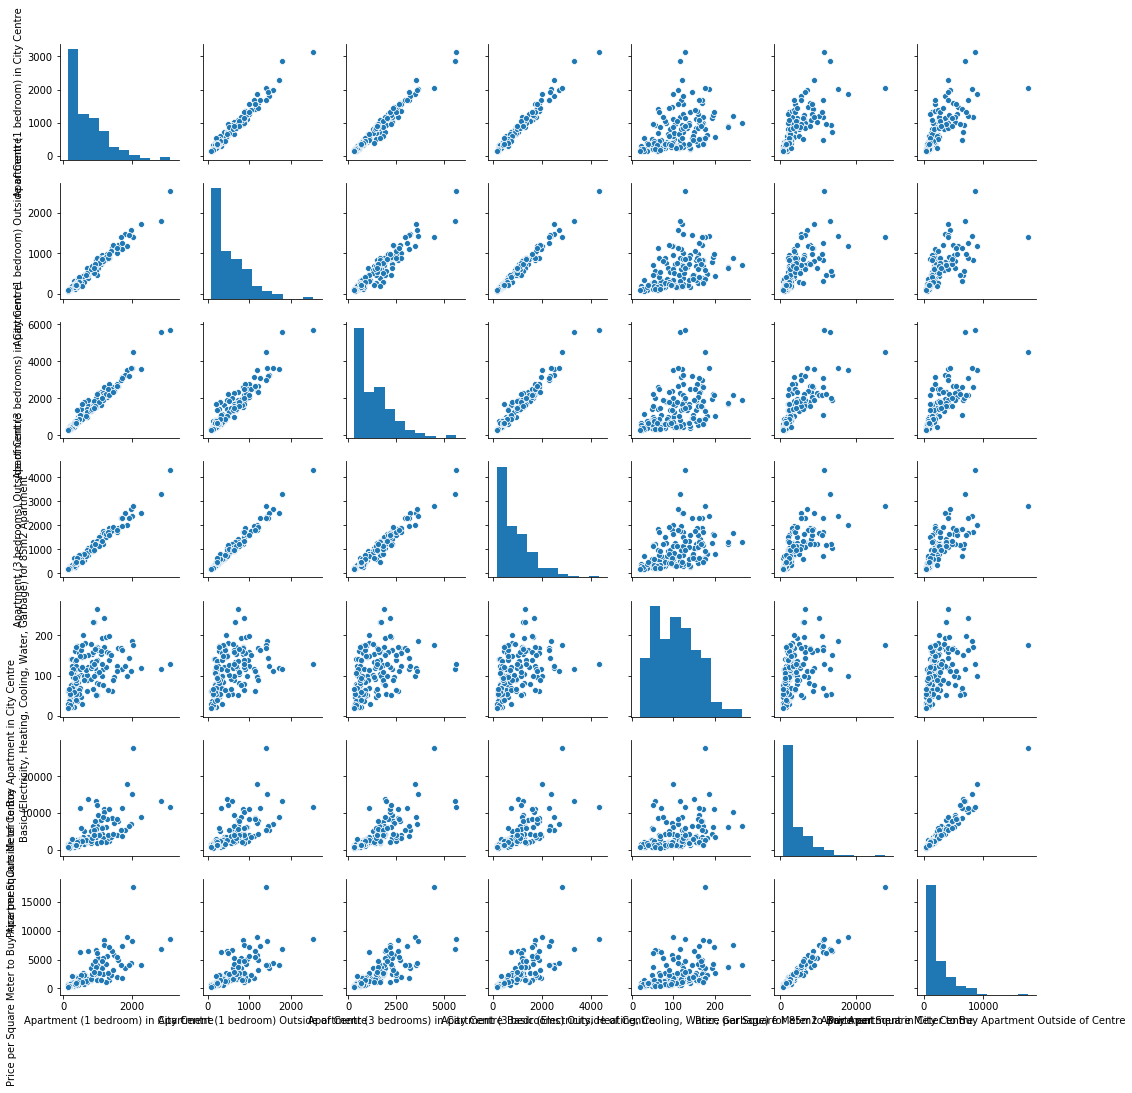

In [6]:
%matplotlib inline
sns.pairplot(housing_costs)

##### Use PCA to reduce dimensions to 2 and be able to cluster cities

In [7]:
pca = PCA(n_components=2)
pca_cost_of_living = pca.fit(cost_living_data_t)

%matplotlib inline
pca_cost_of_living


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

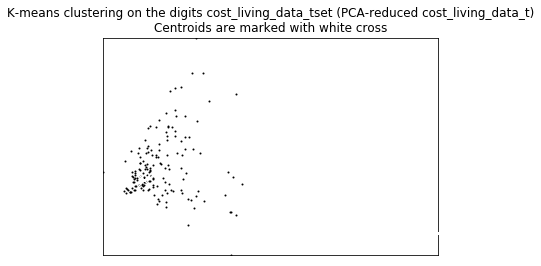

In [8]:
#################################################################################
# TODO: Adapt the PCA and clustering method to answer Question 2                #
#################################################################################

reduced_cost_living_data_t = PCA(n_components=2).fit_transform(cost_living_data_t)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_cost_living_data_t)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_cost_living_data_t[:, 0].min() - 1, reduced_cost_living_data_t[:, 0].max() + 1
y_min, y_max = reduced_cost_living_data_t[:, 1].min() - 1, reduced_cost_living_data_t[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
# Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(x_min, x_max, y_min, y_max),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

plt.plot(reduced_cost_living_data_t[:, 0], reduced_cost_living_data_t[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits cost_living_data_tset (PCA-reduced cost_living_data_t)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()